**任务时间：题目1-3（11.05-11.10）
题目4、5（11.12-11.17）
题目6（11.19-11.25）**

**互评与筛选时间：题目1-3（11.11）
题目4、5（11.18）
题目6（11.26）**

每周只用提交相应的部分到自己的git，试题实行每周淘汰制

新互评链接：https://yiqixie.com/s/home/fcACT-kZRz10FXWBU2jXDt8VO

4、调用alpha101、alpha191、技术因子、candleresearch或者自己创造衍生因子，要求：任意两个因子，进行画图观察，主要例子看alpha101research和candleresearch，写研究报告（画了什么因子，思考了什么现象，对现象进行描述）

因子一：MACD

In [78]:

import warnings
from jaqs_fxdayu.data.dataservice import LocalDataService
warnings.filterwarnings('ignore')
ds = LocalDataService()

## 加freq参数
path = r'../min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high,low,close,volume',
         'symbol': 'BTCUSDT:binance',
         'freq': '30Min,1H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据

from jaqs_fxdayu.data.hf_dataview import HFDataView

dv1H = HFDataView()
dv1H.create_init_dv(Time_dict['1H'].dropna().set_index(["trade_date","symbol"]))

dv1H.add_formula('MACD',"Ta('EMA',0,0,0,0,close,0,12)-Ta('EMA',0,0,0,0,close,0,26)",add_data=True)
dv1H.add_formula('MACD_Signal',"Ta('EMA',0,0,0,0,MACD,0,9)",add_data=True)
dv1H.add_formula('MACD_Hist',"(MACD-MACD_Signal)",add_data=True)

import matplotlib.pyplot as plt
import pandas as pd

def Plot_Mean(dv, MACD_Hist, MACD_Signal,MACD,chart_name='dv1H_MACD', n=0):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(MACD_Hist.iloc[n:],color='blue',alpha=1)
    ax1.plot(MACD_Signal.iloc[n:],color='green',alpha=0.3)
    ax1.plot(MACD.iloc[n:],color='red',alpha=0.3)
    ax1.hlines(0, MACD.iloc[n:].index[0], MACD.iloc[n:].index[-1], alpha=0.4, linestyle='--')
    #ax1.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[n:],color='orange')
    #ax1.plot(pd.Series(BBI.rolling(ShortPeriod).mean(), index=BBI.index).iloc[n:],color='orange')
    #ax1.plot(pd.Series(BBI.rolling(LongPeriod).mean(), index=BBI.index).iloc[n:],color='g')
    # plt.savefig(chart_name)
    plt.show()


    
MACD=dv1H.get_ts('MACD', date_type='datetime') 
MACD_Signal=dv1H.get_ts('MACD_Signal', date_type='datetime') 
MACD_Hist=dv1H.get_ts('MACD_Hist', date_type='datetime') 
#dv_dict = {'MACD_dv30M':dv30M,'MACD_dv1H':dv1H}
#MACD_dict = {n: dv.get_ts('MACD_Hist', date_type='datetime') for n, dv in dv_dict.items()}

Initialize dataview success.
Initialize dataview success.


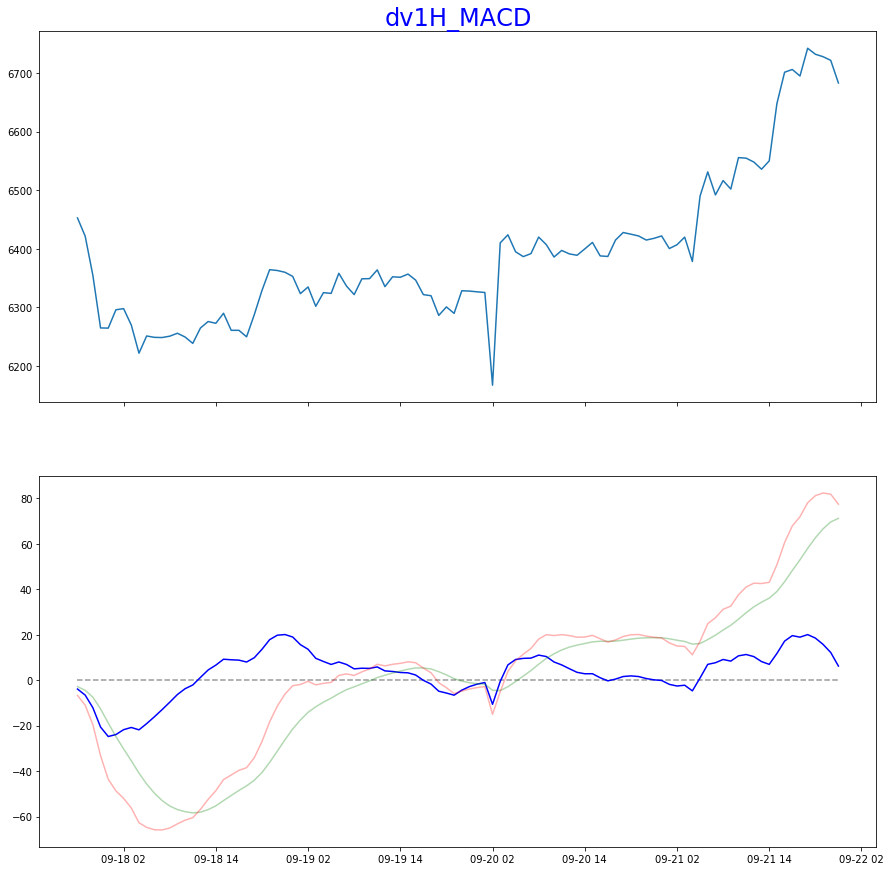

In [79]:
Plot_Mean(dv1H, MACD_Hist.iloc[:,0], MACD_Signal.iloc[:,0], MACD.iloc[:,0], n=-100)

现象：
因子一为MACD因子，通过观察发现MACD与价格的升降趋势有关
主要表现为MACD（蓝线）上穿0值时出现上涨趋势，下穿0值时出现下跌趋势
进场信号：MACD上穿0值时看多，下穿0值时看空

因子二： CMO
因子描述：钱德动量摆动指标（Chande Momentum Osciliator），与其他动量指标摆动指标如相对强弱指标（RSI）和随机指标（KDJ）不同，钱德动量指标在计算公式的分子中采用上涨日和下跌日的数据。

计算方法：

1、SU是今日收盘价与昨日收盘价（上涨日）差值加总。若当日下跌，则增加值为0； 
2、SD是今日收盘价与昨日收盘价（下跌日）差值的绝对值加总。若当日上涨，则增加值为0。 
3、CMO = (SU - SD)/ (SU + SD) * 100.

In [22]:
import warnings
from jaqs_fxdayu.data.dataservice import LocalDataService
warnings.filterwarnings('ignore')
ds = LocalDataService()

## 加freq参数
path = r'../min_data/VnTrader_1Min_Db'
props = {'fields': 'open,high_adj,low_adj,close,volume',
         'symbol': 'BTCUSDT:binance',
         'freq': '30Min,1H',
         'start_date':20180601000000}

Time_dict = ds.bar_reader(path,props) #读取数据

from jaqs_fxdayu.data.hf_dataview import HFDataView

dv1H = HFDataView()
dv1H.create_init_dv(Time_dict['1H'].dropna().set_index(["trade_date","symbol"]))
dv1H.add_formula('CMO_long', "Ta('CMO',0,0,0,0,close,0,14)", add_data = True)
dv1H.add_formula('CMO_short', "Ta('CMO',0,0,0,0,close,0,6)", add_data = True)


import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
def Plot(dv, indicator1, indicator2, chart_name, n):
    fig,(ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,15))
    ax.plot(dv.get_ts('close', date_type='datetime').iloc[:,0].iloc[-n:])
    ax.set_title(chart_name,fontsize=24,color='b') 
    ax1.plot(indicator1.iloc[-n:], color = 'green')
    ax1.plot(indicator2.iloc[-n:],color = 'red')
    ax1.hlines(0, indicator1.iloc[n:].index[], indicator1.iloc[n:].index[-1], alpha=0.4, linestyle='--')
    plt.show()

CMO_long = dv1H.get_ts('CMO_long', date_type='datetime')
CMO_short = dv1H.get_ts('CMO_short', date_type='datetime')

Initialize dataview success.


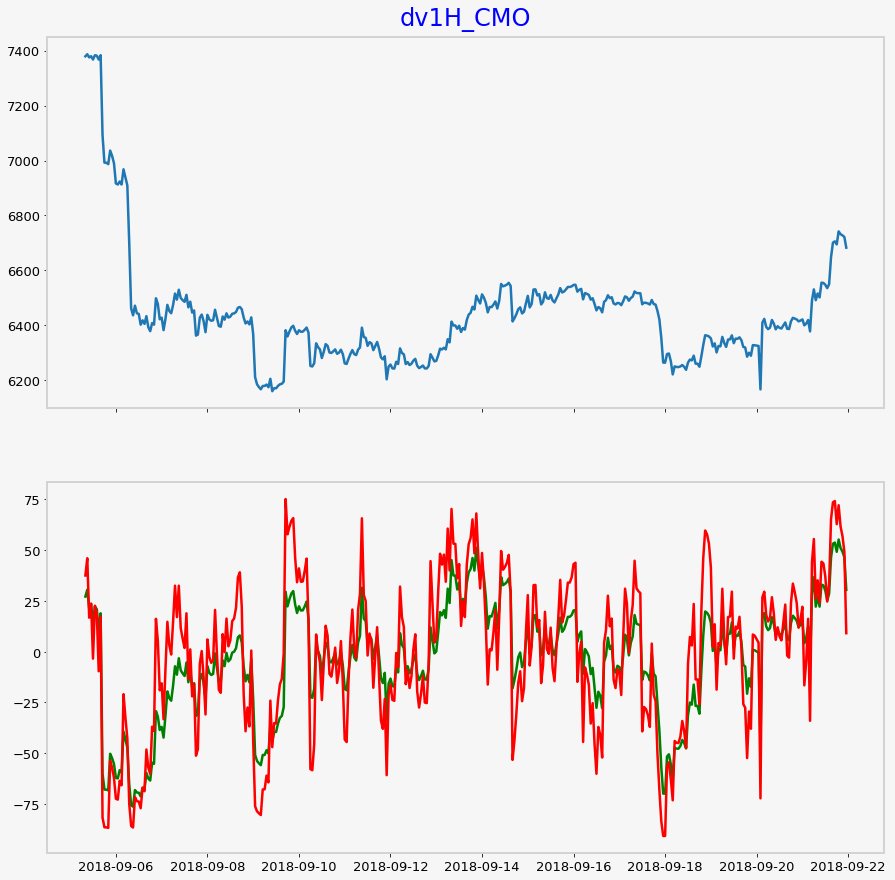

In [23]:
Plot(dv1H, CMO_long, CMO_short, chart_name='dv1H_CMO', n=400)

In [ ]:
现象：
上图中红色线为CMO短期线，绿色线为CMO长期线
可以发现：CMO线随着收盘价的上升而上升，随着收盘价的下跌而下跌，
当股价达到局部的极值点时CMO线也达到了局部的极值点

# 5、观察两个因子，和价格图有什么联系，如果是蜡烛图，和成交量有什么联系，怎么找到相应的信号，提出自己信号进出场的假设。（分别完成两个因子的信号假设）

信号进出场假设：可以借鉴MastatiscResearch，但不要将思路假设局限在均线上，可以观察大盘上的其他现象来写信号假设，也可以进行同时满足多个因子的信号来设计信号假设等等。

此处需要说出联系、找到的信号、你的信号进出场假设是什么

 MACD因子
 与价格趋势相关
 MACD线上穿、下穿0轴，即为进出场信号

 进出场条件：
 在MACD线上穿0轴时开多，下穿0轴时平多
 在MACD线下穿0轴时开空，上穿0轴时平空

In [ ]:
CMO因子的长短期线交叉与价格趋势有关
当短期线上穿过长期线时，股价的上升趋势加强，两线距离越远上升趋势越强；
当短期线下穿过长期线时，股价的下降趋势加强，两线距离越远下降趋势越强。
进出场条件：短期线上穿长期线时看多，下穿长期线时看空

# 6、将你的其中一个假设落实，如果能完成两个更好，但不强求

利用TimingSignal最后输出long、short、long_short这三个绩效表出来


In [ ]:
#设置MACD进出场信号
long = dv1H.add_formula('longMACD','If((MACD_Hist>0) && (Delay(MACD_Hist,1)<=0),2,0)',add_data = True)    
short = dv1H.add_formula('shortMACD','If((MACD_Hist<=0) && (Delay(MACD_Hist,1)>0),-2,0)',add_data = True)  
#出场信号
close_long = dv1H.add_formula('closeLongMACD','If(longMACD==-2,1,0)',add_data = True)
close_short = dv1H.add_formula('closeShortMACD','If(shortMACD==2,-1,0)',add_data = True)

dv1H.get_ts('longMACD').stack()[dv1H.get_ts('longMACD').stack()==2]
dv1H.get_ts('shortMACD').stack()[dv1H.get_ts('shortMACD').stack()==2]

In [93]:
#输出MACD绩效
from jaqs_fxdayu.research import TimingDigger

def TimingSignal(td, dv, long='long', short='short', closeLong='closeLong', closeShort='closeShort', mhp=None, sl=None, sp=None):
    
    td.process_signal(
        sig_type='long',
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        price=dv.get_ts('close'),
        max_holding_period=mhp,
        stoploss=-sl,
        stopprofit=sp
    )
    
    td.process_signal(
        sig_type='short',
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        price=dv.get_ts('close'),
        max_holding_period=mhp,
        stoploss=-sl,
        stopprofit=sp
    )

tdMACD = TimingDigger(output_folder='.', output_format='pdf', signal_name='MACD_Hist')
TimingSignal(tdMACD, dv1H, 'longMACD', 'shortMACD', 'closeLongMACD', 'closeShortMACD', mhp=100, sl=0.05, sp=0.3)

tdMACD.create_event_report(sig_type="long")
tdMACD.create_event_report(sig_type="short")
tdMACD.create_event_report(sig_type="long_short")

Nan Data Count (should be zero) : 0;  Percentage of effective data: 3%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 4%
*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               7.697 -15.482   0.047
p-value              0.000   0.000   0.963
mean                 0.050  -0.045   0.000
std                  0.043   0.020   0.058
info_ratio           1.160  -2.235   0.005
skewness             1.772   0.952   0.941
kurtosis             2.672  -0.238   0.813
pct5                 0.009  -0.067  -0.064
pct25                0.024  -0.057  -0.053
pct50                0.035  -0.053  -0.002
pct75                0.048  -0.030   0.035
pct95                0.136  -0.003   0.106
occurance           45.000  49.000  94.000
win_ratio              NaN     NaN   0.479
win_mean/loss_mean     NaN     NaN   1.102
*****-Summary-*****
Event Analysis
                       win    loss     all
t-stat               8.904 -20.966   0.362
p-value       

从统计量中可以看出，MACD作为因子在统计意义上是显著的（p值接近0），但仅通过MACD上下穿过0值来进行买入卖出的效果也仅仅是差强人意，win ratio略高于0.4，win/lose的mean之比略大于1。主要原因可能是因为MACD作为均线类指标，具有比较严重的滞后性，虽然可以预示价格趋势，但很难确定趋势的发生和持续时间，另外，数据的选取以1H为单位，MACD表现出来的主要是长期趋势，因此在进出场点中会出现很多空值，这是由于数据的选取造成的。总的来讲仅以MACD来进行买卖，效果并不是太好。


In [12]:
#设定CMO因子进出场信号，短CMO上穿长线时看多，下穿时看空
long = dv1H.add_formula('longCMO','If((CMO_short>CMO_long) && (Delay(CMO_short,1)<=Delay(CMO_long,1)),2,0)',add_data = True)    
short = dv1H.add_formula('shortCMO','If((CMO_short<=CMO_long) && (Delay(CMO_short,1)>Delay(CMO_long,1)),-2,0)',add_data = True)  
#出场信号
close_long = dv1H.add_formula('closeLongCMO','If(longCMO==-2,1,0)',add_data = True)
close_short = dv1H.add_formula('closeShortCMO','If(shortCMO==2,-1,0)',add_data = True)


Field [longCMO] is overwritten.
Field [shortCMO] is overwritten.
Field [closeLongCMO] is overwritten.
Field [closeShortCMO] is overwritten.


In [15]:
#输出CMO因子绩效，操作与MACD类似
from jaqs_fxdayu.research import TimingDigger

def TimingSignal(td, dv, long='long', short='short', closeLong='closeLong', closeShort='closeShort', mhp=None, sl=None, sp=None):
    
    td.process_signal(
        sig_type='long',
        enter_signal=dv.get_ts(long),
        exit_signal=dv.get_ts(closeLong),
        price=dv.get_ts('close'),
        max_holding_period=mhp,
        stoploss=-sl,
        stopprofit=sp
    )
    
    td.process_signal(
        sig_type='short',
        enter_signal=dv.get_ts(short),
        exit_signal=dv.get_ts(closeShort),
        price=dv.get_ts('close'),
        max_holding_period=mhp,
        stoploss=-sl,
        stopprofit=sp
    )

tdCMO = TimingDigger(output_folder='.', output_format='pdf', signal_name='CMO')
TimingSignal(tdCMO, dv1H, 'longCMO', 'shortCMO', 'closeLongCMO', 'closeShortCMO', mhp=100, sl=0.05, sp=0.3)


Nan Data Count (should be zero) : 0;  Percentage of effective data: 10%
Nan Data Count (should be zero) : 0;  Percentage of effective data: 11%


In [14]:
tdCMO.create_event_report(sig_type="long")
tdCMO.create_event_report(sig_type="short")
tdCMO.create_event_report(sig_type="long_short")

*****-Summary-*****
Event Analysis
                        win     loss      all
t-stat               13.286  -23.904    0.237
p-value               0.000    0.000    0.813
mean                  0.048   -0.044    0.001
std                   0.042    0.022    0.057
info_ratio            1.148   -2.013    0.014
skewness              1.763    0.703    0.873
kurtosis              2.997   -0.516    0.799
pct5                  0.005   -0.067   -0.063
pct25                 0.024   -0.058   -0.053
pct50                 0.036   -0.052   -0.002
pct75                 0.054   -0.027    0.036
pct95                 0.141   -0.004    0.102
occurance           135.000  142.000  277.000
win_ratio               NaN      NaN    0.487
win_mean/loss_mean      NaN      NaN    1.089
*****-Summary-*****
Event Analysis
                        win     loss      all
t-stat               15.988  -26.231    1.011
p-value               0.000    0.000    0.313
mean                  0.063   -0.041    0.004
std       